***
# Problem 6: Newton-Raphson method

Given the equation $$e^{0.3x}ln(x) = x+2$$
We can write it as $$y = e^{0.3x}ln(x)-x-2 $$
Finding the derivative $$y^{'}=0.3e^{0.3x}ln(x)+\frac{e^{0.3x}}{x}-1$$
Performing iteration with the below equation taking x=6 as the initial guess $$x_{i+1} = x_{i} - \frac{f_{i}}{f^{'}_{i}} $$

x =  4.89389362525


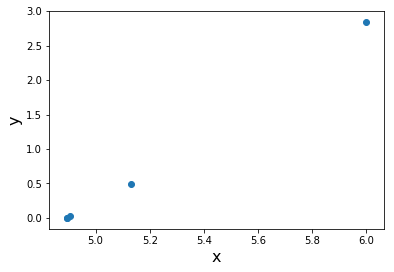

      X               Y        
------------- -----------------
          6.0     2.83951312985
5.12901803852    0.487320542025
4.90681947262   0.0253545117731
4.89393498811 8.08754746275e-05
4.89389362568 8.30999269397e-10


In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import math 

x=6
y=np.exp(0.3*x)*np.log(x)-2-x
lx = []
ly = []
while y > 0.00001:
	y=np.exp(0.3*x)*np.log(x)-2-x
	dy=0.3*np.exp(0.3*x)*np.log(x)+(1/x)*np.exp(0.3*x) - 1
	xn = x - (y/dy)
# 	print("x = ",x)
	lx.append(x)
	x = xn
# 	print("y = ",y)
	ly.append(y)
print("x = ",x)
# potting the points
plt.scatter(lx, ly)
plt.ylabel('y', fontsize=16)
plt.xlabel('x', fontsize=16)
# function to show the plot
plt.show()
t = Table([lx, ly], names=('X', 'Y'))
print(t)

# Problem 5: Trapezoidal Method










 No        h        IntegralApprox  IntegralExact       Error      
--- --------------- -------------- -------------- -----------------
  1             0.2  1.10661589574  1.10714871779 0.000532822057604
  2             0.1  1.10701541645  1.10714871779  0.00013330134478
  3 0.0666666666667  1.10708946485  1.10714871779 5.92529394907e-05
  4            0.05  1.10711538646  1.10714871779 3.33313337444e-05
  5            0.04  1.10712738528  1.10714871779 2.13325144161e-05
  6 0.0333333333333  1.10713390337  1.10714871779 1.48144200054e-05
  7 0.0285714285714  1.10713783365  1.10714871779   1.088414074e-05
  8           0.025  1.10714038459  1.10714871779 8.33320857274e-06
  9 0.0222222222222  1.10714213351  1.10714871779  6.5842843413e-06
 10            0.02  1.10714338451  1.10714871779 5.33328237085e-06

 Slope of the log-log curve is:  1.99965836495


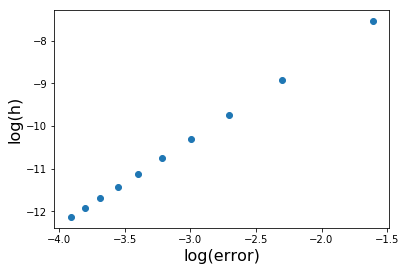

In [9]:
from astropy.table import Table, Column
import matplotlib.pyplot as plt
import numpy as np 

a=0
b=2
ival=[]
hval=[]
no = []
exact = []
error =[]
def calculate(n):
	h=(b-a)/n
	hval.append(h)
	A=0
	for x in range(n):
		A=A+0.5*h*(1/(1+x*h*x*h) + 1/(1+(x*h+h)*(x*h+h)))
	return(A)

for x in range(1,11):
	ival.append(calculate(10*x))


for x in range(1,11):
	no.append(x)
	exact.append(1.1071487177943273)
# exact solution   1.1071487177943273

for x in range(10):
	error.append(abs(ival[x]-exact[x]))

t = Table([no , hval, ival, exact , error], names=('No','h', 'IntegralApprox' , ' IntegralExact', 'Error'))
print(t)

slope, intercept = np.polyfit(np.log(hval), np.log(error), 1)
print("\n Slope of the log-log curve is: ",slope)

plt.scatter(np.log(hval), np.log(error))
plt.ylabel('log(h)', fontsize=16)
plt.xlabel('log(error)', fontsize=16)
# function to show the plot
plt.show()